In [1]:
!# pip install numpy matplotlib pandas ipympl    # not needed if running in nix shell or docker with docker.io/cschranz/gpu-jupyter:v1.9_cuda-12.6_ubuntu-24.04_python-only

In [2]:
%matplotlib ipympl
import matplotlib


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(0)

In [3]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

## Axeses indices

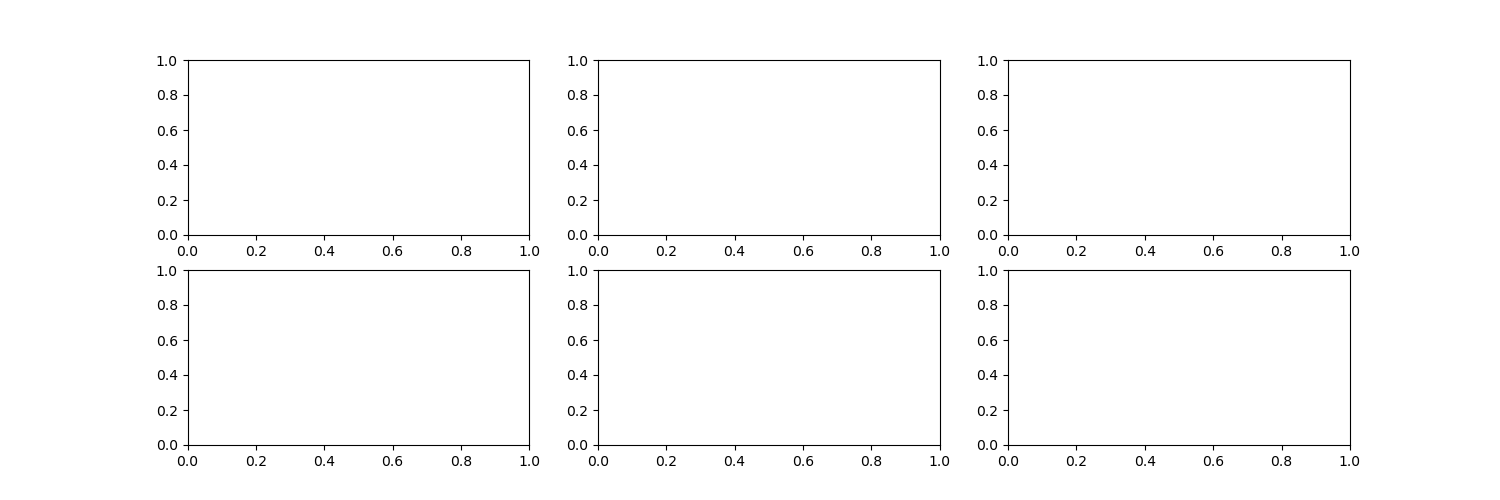

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))

In [5]:
top_left = axs[0, 0]
top_left.plot(x, y)
top_left.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis");

In [6]:
top_right = axs[0, 2]
top_right.plot(x, [-n for n in y])
top_right.set(title="Sample Simple Plot (opposite)", xlabel="x-axis", ylabel="y-axis");

In [7]:
middle_top = axs[0, 1]
middle_top.hist(2);
middle_top.set(title="Fixed value", xlabel="x-axis", ylabel="y-axis");

In [8]:
bottom_left = axs[1, 0]
bottom_left.plot(x, [-n for n in y]);
bottom_right = axs[1, 2]
bottom_right.plot(x, y);

In [9]:

middle_bottom = axs[1, 1]
middle_bottom.hist(np.random.randn(30));

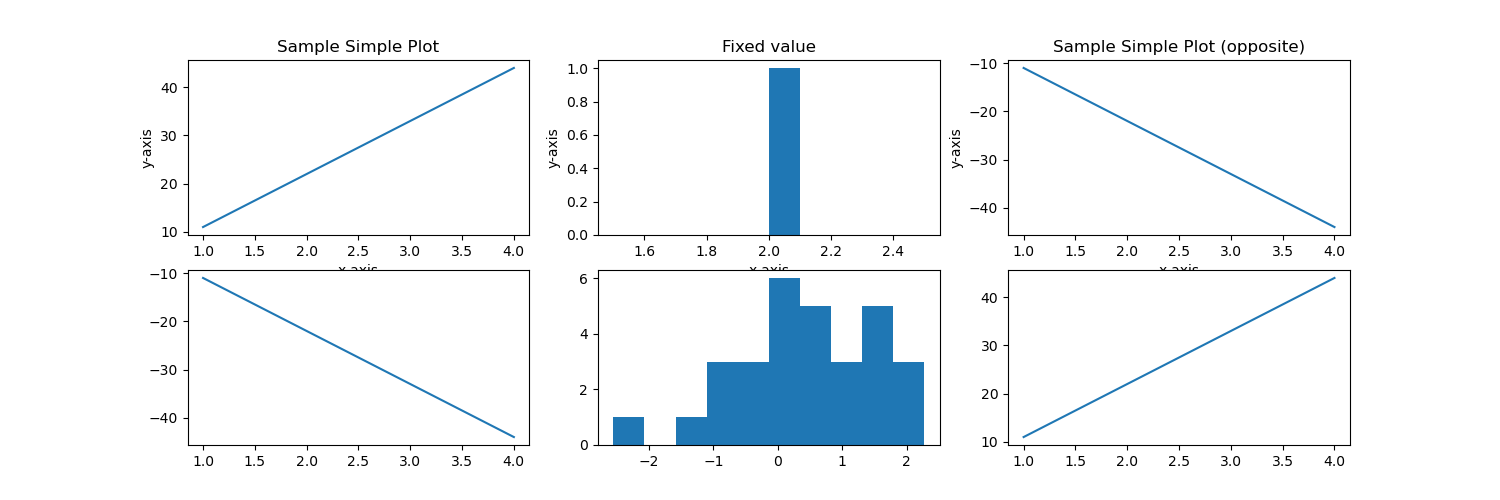

In [10]:
fig.show()

## Axeses destructuring

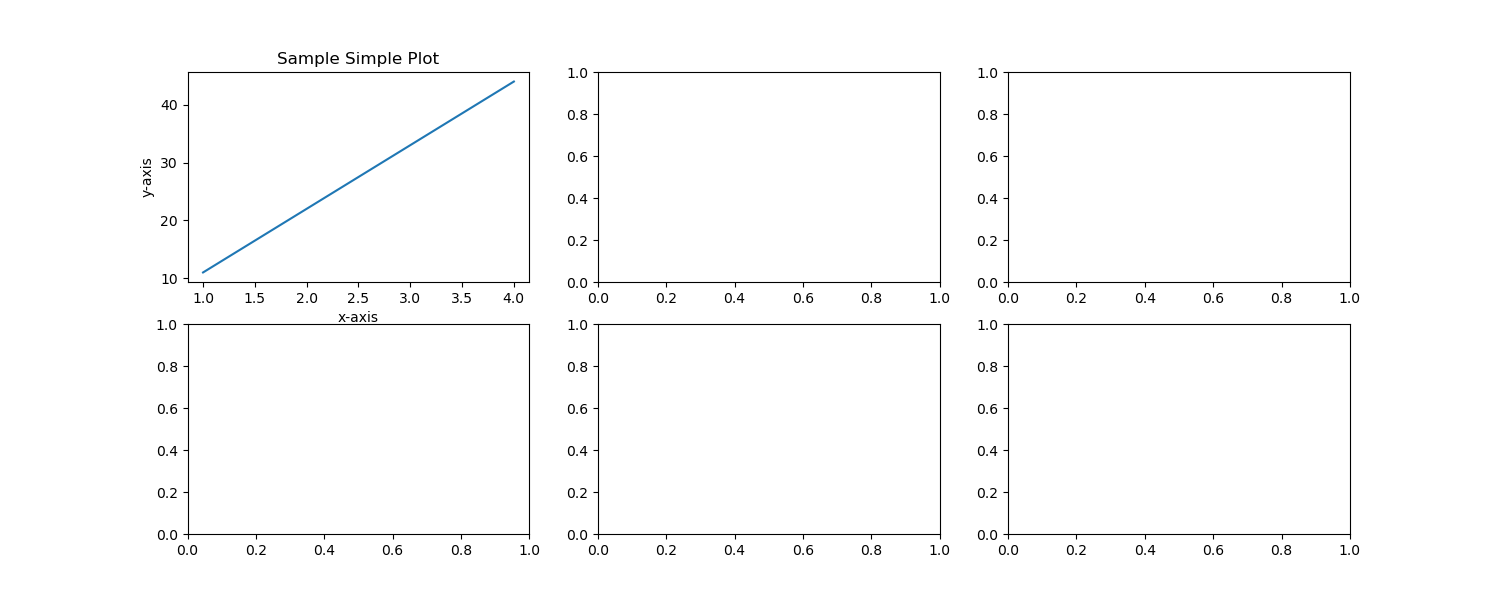

In [11]:
fig, ((top_left, middle_top, top_right), (bottom_left, middle_bottom, bottom_right)) = plt.subplots(nrows=2, 
                                             ncols=3, 
                                             figsize=(15, 6));

# Top Left
top_left.set_ylabel('y-vals')
top_left.set_xlabel('x-vals')
top_left.plot(x, y)
top_left.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis");

In [12]:
domain = np.random.randint(0, 20, 25)
domain.sort()
figure = np.square(domain)

In [13]:
middle_top.set_xlabel('domain')
middle_top.set_ylabel('figure')
middle_top.plot(domain, figure);

In [14]:
figure_n = pd.DataFrame(domain).apply(lambda x: x**x, axis=0)
top_right.plot(domain, figure_n);

In [15]:
bottom_left.bar(domain, figure);

In [16]:
middle_bottom.barh(domain, figure);

In [17]:
bottom_right.scatter(domain, figure);

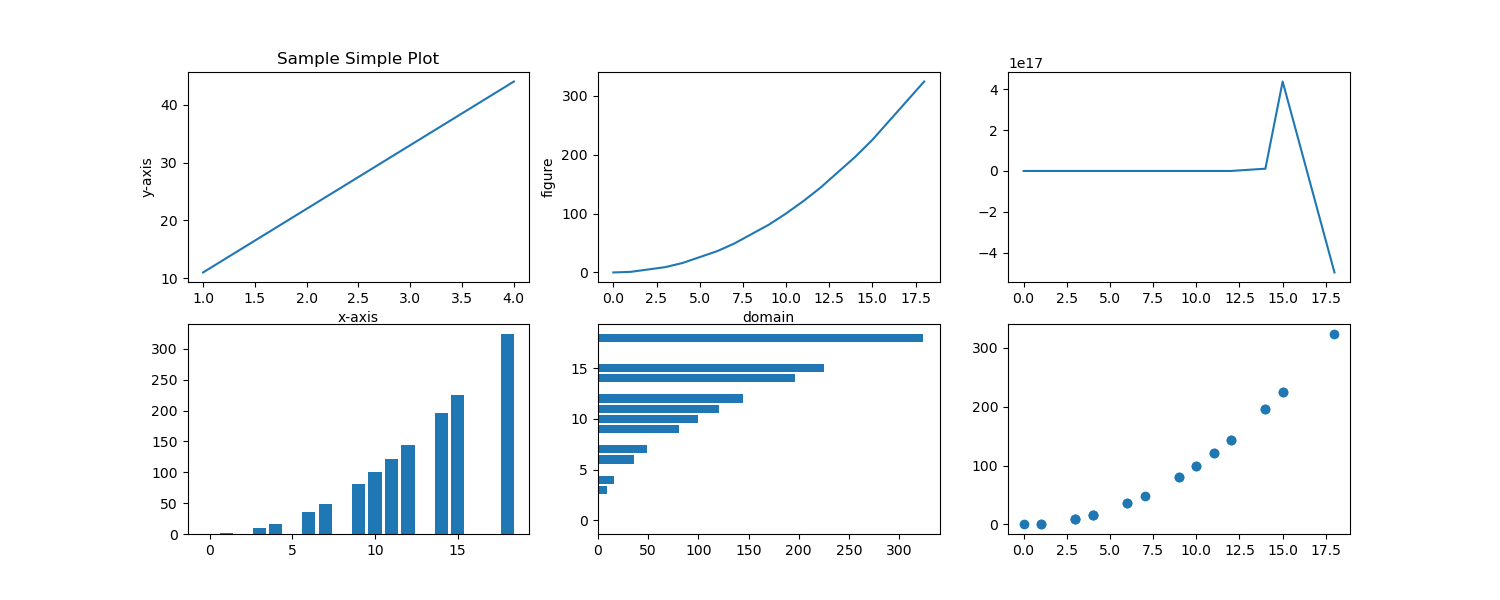

In [18]:
fig.show();

## Pandas

<Axes: >

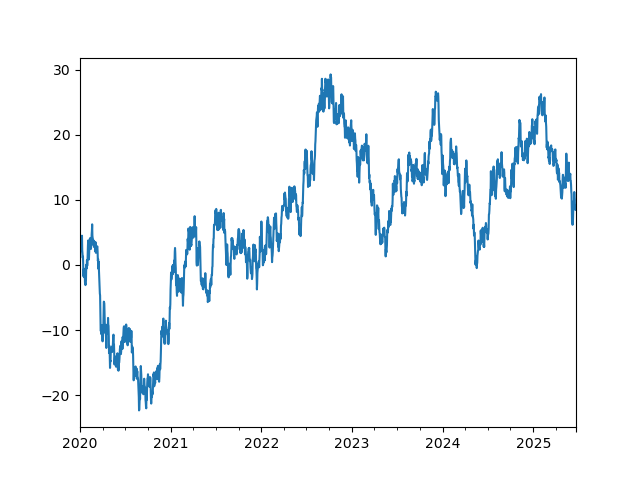

In [22]:
fig, ax = plt.subplots();


timeseries = pd.Series(np.random.randn(2000),
                        index=pd.date_range('01/01/2020', periods=2000))

timeseries.cumsum().plot()

/tmp/ipykernel_45304/1653663021.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots();


,Make,Colour,Odometer (KM),Doors,Price,Total Sales,Sale Date
0,Toyota,White,150043,4,4000,4000,2020-01-01
1,Honda,Red,87899,4,5000,9000,2020-01-02
2,Toyota,Blue,32549,3,7000,16000,2020-01-03
3,BMW,Black,11179,5,22000,38000,2020-01-04
4,Nissan,White,213095,4,3500,41500,2020-01-05
5,Toyota,Green,99213,4,4500,46000,2020-01-06
6,Honda,Blue,45698,4,7500,53500,2020-01-07
7,Honda,Blue,54738,4,7000,60500,2020-01-08
8,Toyota,White,60000,4,6250,66750,2020-01-09
9,Nissan,White,31600,4,9700,76450,2020-01-10


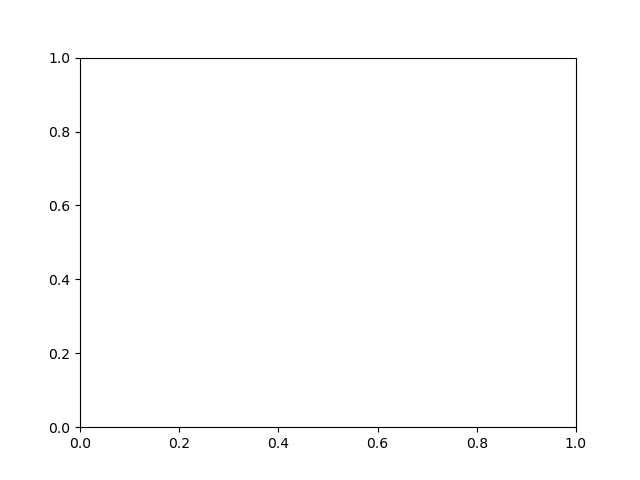

In [24]:
fig, ax = plt.subplots();
sales = pd.read_csv('./car-sales.csv')
sales["Price"] = sales["Price"].str.replace('[$,.]', '', regex=True)
sales['Price'] = sales['Price'].str[:-2].astype(int)
sales['Total Sales'] = sales['Price'].astype(int).cumsum();

# Add a sale date
sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(sales))

sales

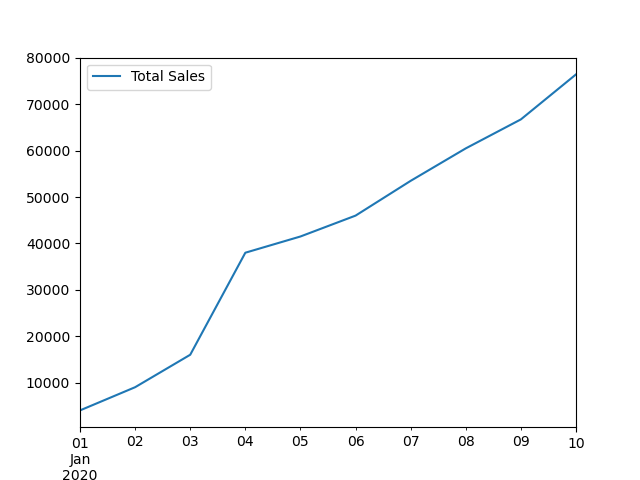

In [23]:
sales.plot(x='Sale Date', y='Total Sales');

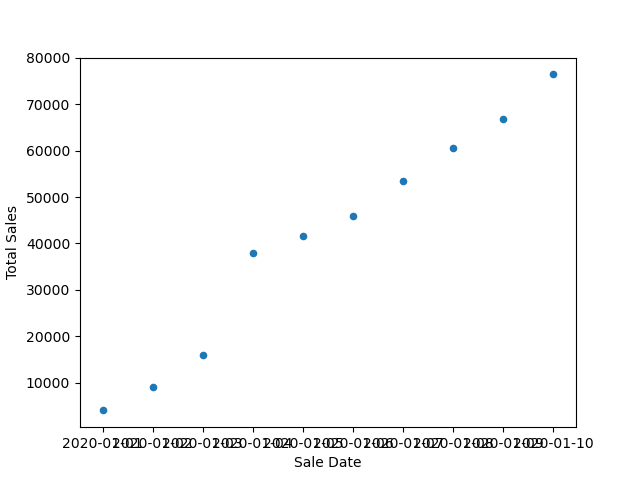

In [25]:
sales.plot(x='Sale Date', y='Total Sales', kind='scatter');

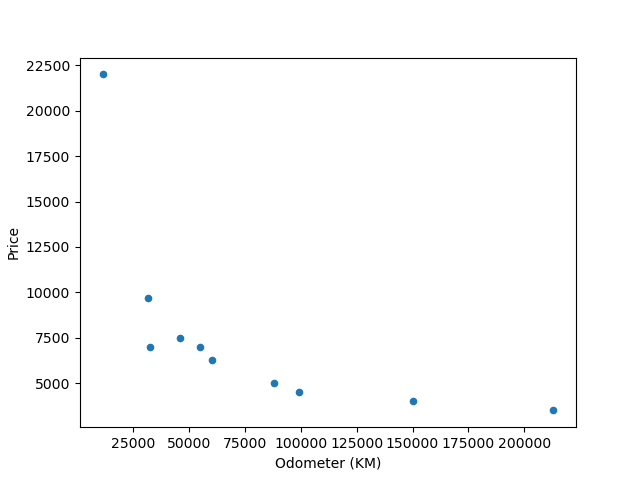

In [26]:
sales.plot(x='Odometer (KM)', y='Price', kind='scatter');

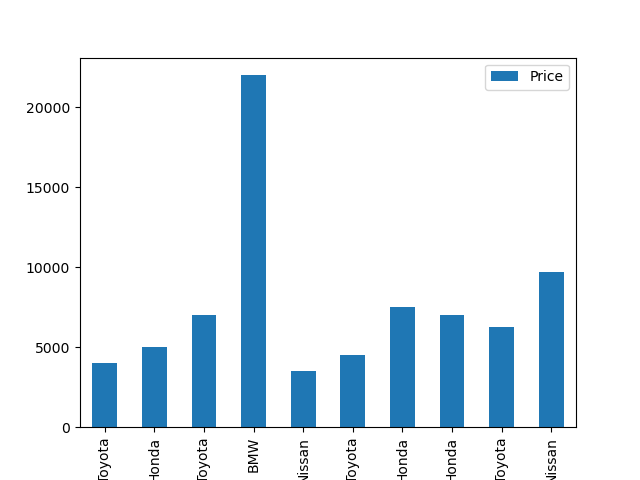

In [27]:
sales.plot(x='Make', y='Price', kind='bar');